In [64]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [66]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
    

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

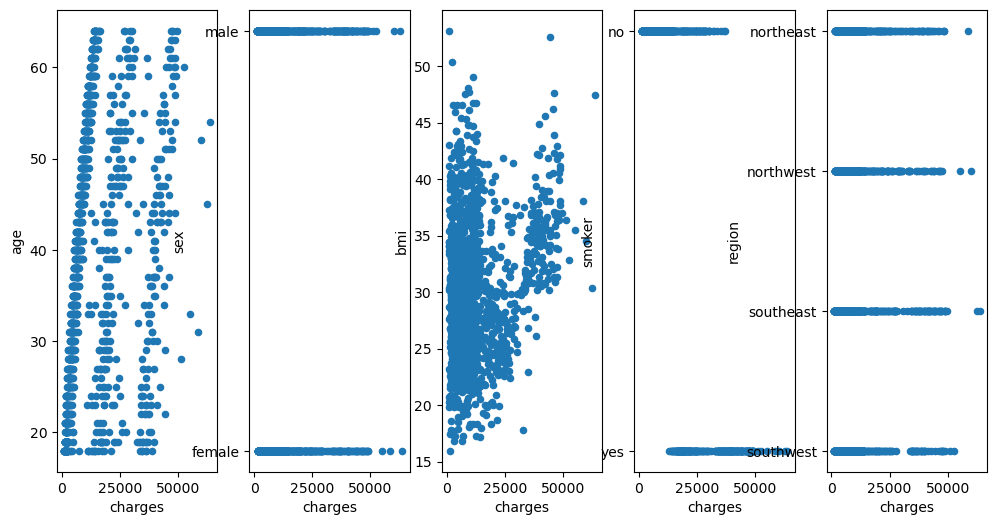

In [71]:
fig,axs = plt.subplots(1,5)

df.plot(kind='scatter',x='charges',y='age',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter',x='charges',y='sex',ax=axs[1],)
df.plot(kind='scatter',x='charges',y='bmi',ax=axs[2])
df.plot(kind='scatter',x='charges',y='smoker',ax=axs[3])
df.plot(kind='scatter',x='charges',y='region',ax=axs[4])

plt.show()

In [84]:
#Use labelencoder to convert categorical values into numerical values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


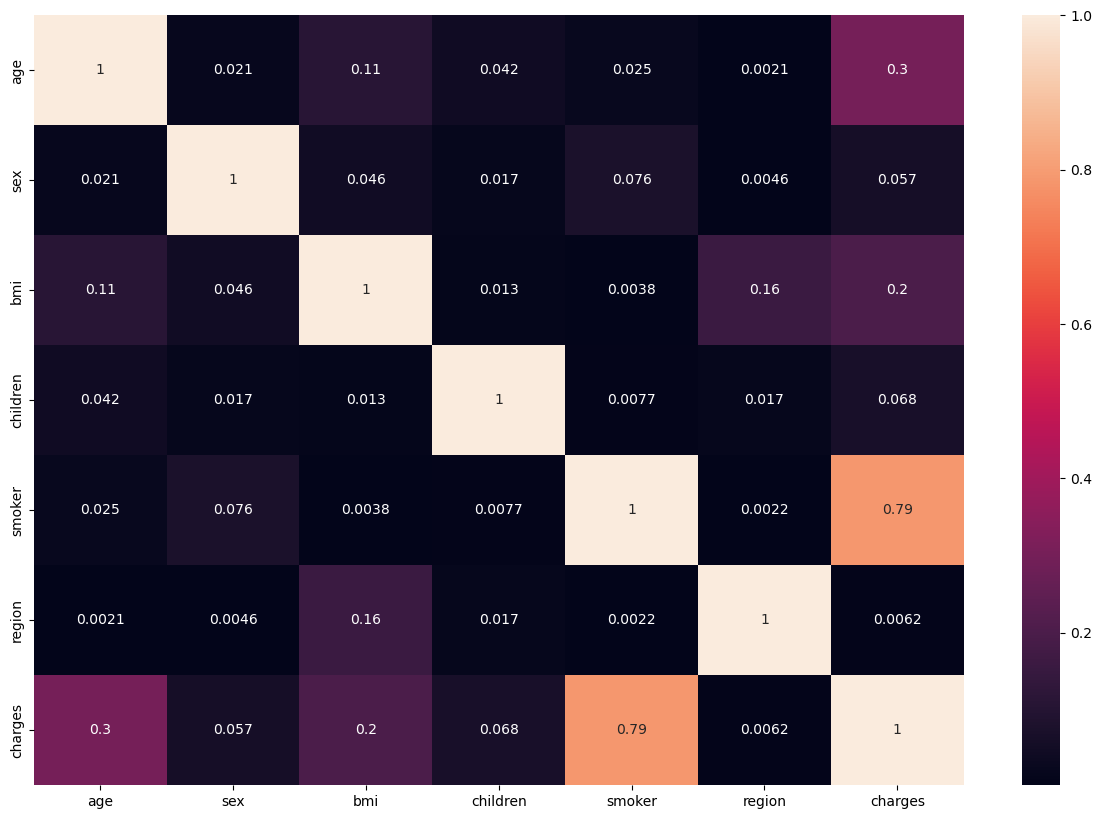

In [85]:
#Use heatmap to check correlation

df_corr = df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot = True,annot_kws={"size" : 10 })
plt.show()

In [91]:
#Select input and output fetures to devide data into train and test 

X = df.drop('charges', axis = 1)
y = df.charges

In [92]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [93]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

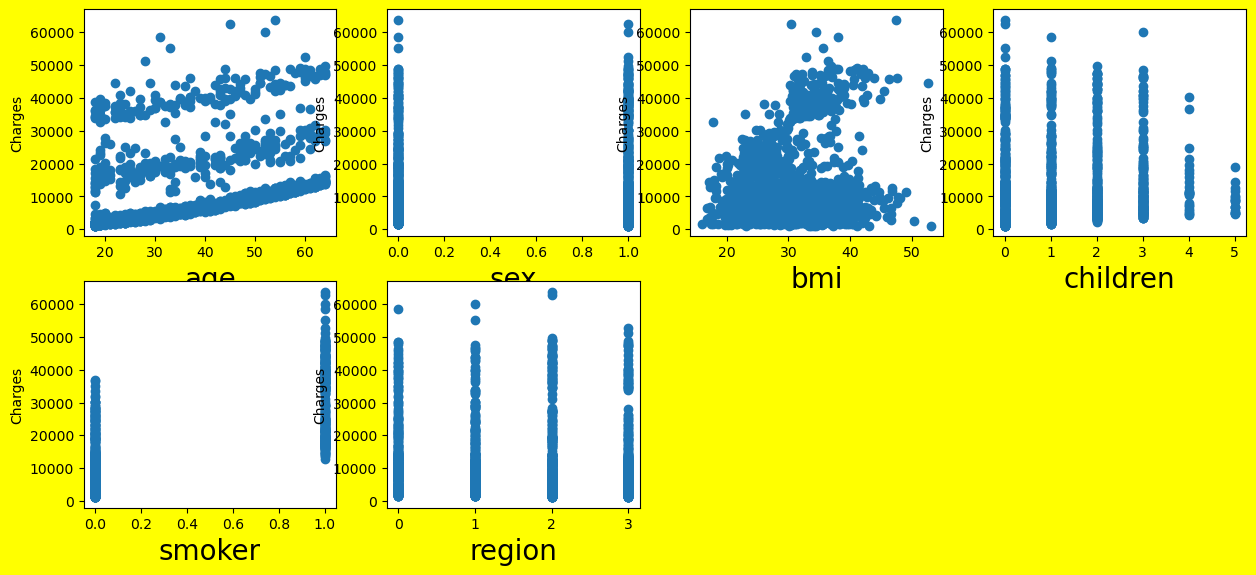

In [97]:
#Visualizing Relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in X:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Charges',fontsize=10)
    plotnumber +=1
plt.show()

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [99]:
#Data  Scaling. Formula Z=(X-Mean)/STD
#Use standardscaler to transforms the data in such a manner that it has mean as 0 and standard deviation as 1
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
#Split Data Into Train And Test.MOdel Will Be Built On Training Data And Tested On
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state=43)
y_train.head()

547    11538.42100
671     3943.59540
780    18259.21600
831     5266.36560
569    45702.02235
Name: charges, dtype: float64

In [101]:
#Use linear regression to train and test the data

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [102]:
#Check prediction according to the train model

y_pred = regression.predict(x_test)
y_pred

array([ 8359.99186416,  6264.75448441,  2947.50999042, 14741.80107379,
       28021.2142867 ,  9974.03259915, 10836.9321382 ,  7264.37197641,
        9644.08236576,  1721.54943272, 27183.43492574, 24919.06415104,
        9290.81023348,  9437.41918216,  2785.47625437,  5318.15764092,
        2935.35204744, 26779.28830496,  7138.91325401,  3857.17325104,
        5139.33559874, 11925.77601022,  2590.15816248, 11177.27900867,
        6973.8849772 ,  7307.66710152, 10867.14569171, 39781.20639001,
        2505.11702503, 12207.75035554, 14513.61376527, 31754.40005804,
       15079.48604285,  1776.02913587, 11884.87871967,  4193.69824853,
        7749.77826555, 12371.36005778, 10239.9314227 ,  5600.90040086,
       27743.0770547 , 27884.21300541,  3821.75419   , 13546.93113814,
       10936.6351053 , 33794.53148415, 11782.4587261 ,  3262.58131749,
       26911.36109259,  7140.83138296,  1193.45818607,  6254.23219158,
        8843.60997305, 32086.3048815 ,  2413.7042464 ,  2081.3959038 ,
      

In [103]:
#Check all type of errors for model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
MSE = mean_squared_error(y_test, y_pred)
RMSE = sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
print(MSE)
print(RMSE)
print(MAE)

44613835.96547592
6679.358948692301
4608.840434932002


In [107]:
#Adjusted R2 Score
print(regression.score(x_train,y_train))
print(regression.score(x_test,y_test))


0.7581113362088554
0.7245534147592938


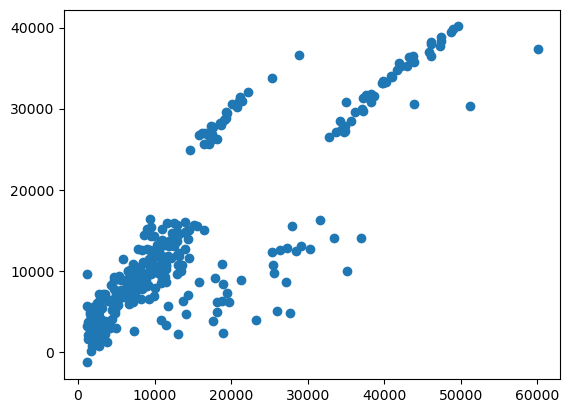

In [105]:
plt.scatter(y_test,y_pred)

plt.show()

In [108]:
import pickle
model = pickle.dumps(regression)
saved_model = pickle.loads(model)